In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench import (Model, CategoricalParameter, ScalarOutcome, IntegerParameter, RealParameter)
from ema_workbench import (Model, MultiprocessingEvaluator, SequentialEvaluator, Policy, Scenario, Constant)
from dike_model_function import DikeNetwork 

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation

ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(9)


In [2]:
policies = [
Policy('final', **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 2, 
                    'A.1_DikeIncrease 0': 3, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 2, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 5, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 8, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 2, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})
]

In [3]:
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from SALib.analyze import sobol

dike_model, planning_steps = get_model_for_problem_formulation(9)

# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results = evaluator.perform_experiments(scenarios=1000, policies=policies, uncertainty_sampling='sobol')
    
# experiments, outcomes = results

# outcomes_df = pd.DataFrame(outcomes)
# experiments.to_excel('./export/final_policy_pf9_experiments.xlsx')
# outcomes_df.to_excel('./export/final_policy_pf9_outcomes.xlsx')

experiments = pd.read_excel('./export/final_policy_pf9_experiments.xlsx', index_col=0, )
outcomes_df = pd.read_excel('./export/final_policy_pf9_outcomes.xlsx', index_col=0, )

In [4]:
outcomes_statistics = pd.DataFrame()
single_mean = {}
single_std = {}
single_min = {}
single_max = {}
single_90th = {}

for key in outcomes_df.keys(): #loop x times for each key in outcomes
    single_mean[key] = np.mean(outcomes_df[key])
    single_std[key] = np.std(outcomes_df[key])
    single_min[key] = np.min(outcomes_df[key])
    single_max[key] = np.max(outcomes_df[key])
    single_90th[key] = np.percentile(outcomes_df[key],90)
outcomes_statistics = outcomes_statistics.append(pd.DataFrame(single_mean, index = ['mean']))
outcomes_statistics = outcomes_statistics.append(pd.DataFrame(single_std, index = ['std']))
outcomes_statistics = outcomes_statistics.append(pd.DataFrame(single_min, index = ['min']))
outcomes_statistics = outcomes_statistics.append(pd.DataFrame(single_max, index = ['max']))
outcomes_statistics = outcomes_statistics.append(pd.DataFrame(single_90th, index = ['90th']))


In [5]:
outcomes_statistics

,EAD,END,TIC,EEC,A1/2_EAD,A1/2_END,A3_EAD,A3_END,G_TIC,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths
mean,2.631337e+08,0.056366,1.575955e+08,11523.296678,1.935832e+08,0.035948,2.005995e+07,0.008970,1.139083e+08,1.919574e+08,0.025726,8.673573e+07,0.010222,4.885834e+07,0.008970,1.626165e+07,0.000020,7.691606e+07,0.011428
std,4.200970e+08,0.082038,2.384186e-05,13570.248058,4.184680e+08,0.072050,1.075731e+08,0.046585,3.564358e-05,4.169280e+08,0.070960,9.903182e+07,0.022148,1.075731e+08,0.046585,1.762303e+06,0.000212,1.045061e+08,0.023674
min,0.000000e+00,0.000000,1.575955e+08,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.139083e+08,4.229151e+07,0.000000,4.281842e+07,0.000000,2.879840e+07,0.000000,1.610892e+07,0.000000,2.757823e+07,0.000000
max,2.361779e+09,0.600913,1.575955e+08,87575.990757,1.975214e+09,0.330451,1.249873e+09,0.473526,1.139083e+08,1.828889e+09,0.258975,6.531271e+08,0.116927,1.278671e+09,0.473526,6.351493e+07,0.005118,7.962591e+08,0.160155
90th,8.822443e+08,0.174869,1.575955e+08,28457.827141,5.829275e+08,0.116599,1.745582e+07,0.007924,1.139083e+08,5.362480e+08,0.095131,1.645492e+08,0.029083,4.625422e+07,0.007924,1.610892e+07,0.000000,1.761360e+08,0.035660


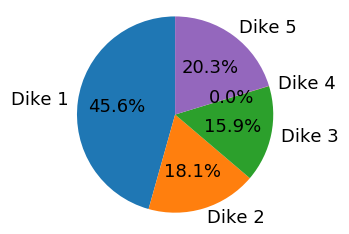

In [38]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Dike 1', 'Dike 2', 'Dike 3', 'Dike 4', 'Dike 5'
sizes = [ outcomes_statistics['A.1_Expected Number of Deaths']['mean']*100,
    outcomes_statistics['A.2_Expected Number of Deaths']['mean']*100, 
    outcomes_statistics['A.3_Expected Number of Deaths']['mean']*100, 
    outcomes_statistics['A.4_Expected Number of Deaths']['mean']*100, 
    outcomes_statistics['A.5_Expected Number of Deaths']['mean']*100 ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rc('font', size=18) 
plt.savefig('export/images/pie_deaths')
plt.show()

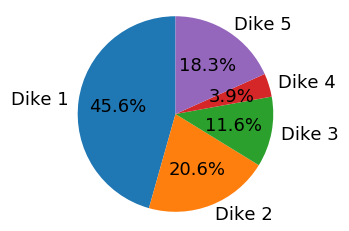

In [37]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Dike 1', 'Dike 2', 'Dike 3', 'Dike 4', 'Dike 5'
sizes = [ outcomes_statistics['A.1 Total Costs']['mean']*100,
    outcomes_statistics['A.2 Total Costs']['mean']*100, 
    outcomes_statistics['A.3 Total Costs']['mean']*100, 
    outcomes_statistics['A.4 Total Costs']['mean']*100, 
    outcomes_statistics['A.5 Total Costs']['mean']*100 ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rc('font', size=18) 
plt.savefig('export/images/pie_damage')
plt.show()

In [46]:
policies = [
Policy('Base', **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 2, 
                    'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})
]

In [47]:
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results = evaluator.perform_experiments(scenarios=100, policies=policies, uncertainty_sampling='sobol')
    
# experiments_base, outcomes_base = results

# outcomes_base_df = pd.DataFrame(outcomes_base)
# experiments_base.to_excel('./export/base_case_9_experiments.xlsx')
# outcomes_base_df.to_excel('./export/base_case_9_outcomes.xlsx')

experiments_base = pd.read_excel('./export/base_case_9_experiments.xlsx', index_col=0, )
outcomes_base_df = pd.read_excel('./export/base_case_9_outcomes.xlsx', index_col=0, )

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 4000 scenarios * 1 policies * 1 model(s) = 4000 experiments
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 2800 cases completed
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [48]:
outcomes_statistics_base = pd.DataFrame()
single_mean = {}
single_std = {}
single_min = {}
single_max = {}
single_90th = {}

for key in outcomes_base_df.keys(): #loop x times for each key in outcomes
    single_mean[key] = np.mean(outcomes_base_df[key])
    single_std[key] = np.std(outcomes_base_df[key])
    single_min[key] = np.min(outcomes_base_df[key])
    single_max[key] = np.max(outcomes_base_df[key])
    single_90th[key] = np.percentile(outcomes_base_df[key],90)
outcomes_statistics_base = outcomes_statistics_base.append(pd.DataFrame(single_mean, index = ['mean']))
outcomes_statistics_base = outcomes_statistics_base.append(pd.DataFrame(single_std, index = ['std']))
outcomes_statistics_base = outcomes_statistics_base.append(pd.DataFrame(single_min, index = ['min']))
outcomes_statistics_base = outcomes_statistics_base.append(pd.DataFrame(single_max, index = ['max']))
outcomes_statistics_base = outcomes_statistics_base.append(pd.DataFrame(single_90th, index = ['90th']))


               EAD       END           TIC           EEC      A1/2_EAD  \
mean  2.631337e+08  0.056366  1.575955e+08  11523.296678  1.935832e+08   
mean  6.222588e+08  0.154367  0.000000e+00  24237.002297  4.286634e+08   

      A1/2_END        A3_EAD    A3_END         G_TIC  
mean  0.035948  2.005995e+07  0.008970  1.139083e+08  
mean  0.078067  1.545163e+08  0.068517  0.000000e+00  


C:\Program Files (x86)\Anaconda\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


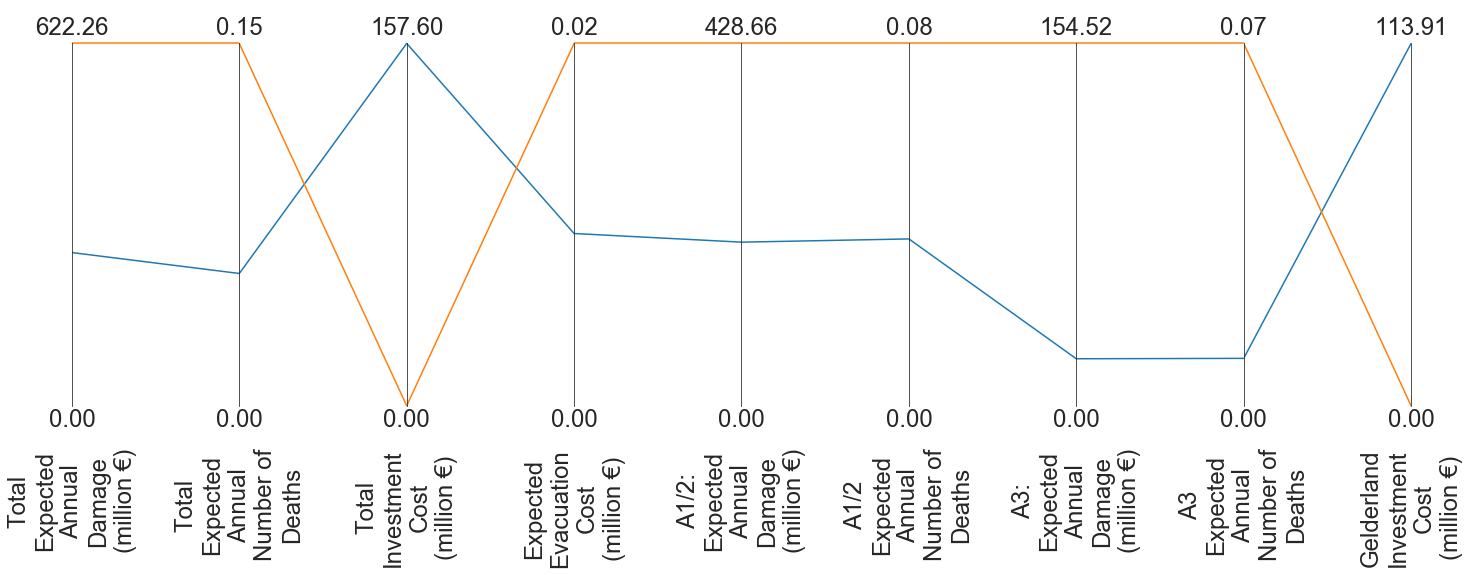

In [53]:
from ema_workbench.analysis import parcoords

parcoords_data = outcomes_statistics.append(outcomes_statistics_base)

data = parcoords_data.iloc[[0, 5],0:9]
print(data)
data['EAD'] = data['EAD'].apply(lambda x: x/1000000)
data['TIC'] = data['TIC'].apply(lambda x: x/1000000)
data['A1/2_EAD'] = data['A1/2_EAD'].apply(lambda x: x/1000000)
data['A3_EAD'] = data['A3_EAD'].apply(lambda x: x/1000000)
data['G_TIC'] = data['G_TIC'].apply(lambda x: x/1000000)
data['EEC'] = data['EEC'].apply(lambda x: x/1000000)

data.rename(columns={'EAD': 'Total\nExpected\nAnnual\nDamage\n(million €)',
                     'END': 'Total\nExpected\nAnnual\nNumber of\nDeaths',
                     'TIC':'Total\nInvestment\nCost\n(million €)',
                     'A1/2_EAD':'A1/2:\nExpected\nAnnual\nDamage\n(million €)',
                     'A1/2_END':'A1/2\nExpected\nAnnual\nNumber of\nDeaths',
                     'A3_EAD':'A3:\nExpected\nAnnual\nDamage\n(million €)',
                     'A3_END':'A3\nExpected\nAnnual\nNumber of\nDeaths',
                     'G_TIC':'Gelderland\nInvestment\nCost\n(million €)',
                     'EEC':'Expected\nEvacuation\nCost\n(million €)'}
            , inplace=True)

limits = parcoords.get_limits(data)
limits.loc[0, ['Total\nExpected\nAnnual\nDamage\n(million €)',
               'Total\nExpected\nAnnual\nNumber of\nDeaths',
               'Total\nInvestment\nCost\n(million €)', 
               'Expected\nEvacuation\nCost\n(million €)', 
               'A1/2:\nExpected\nAnnual\nDamage\n(million €)', 
               'A1/2\nExpected\nAnnual\nNumber of\nDeaths', 
               'A3:\nExpected\nAnnual\nDamage\n(million €)', 
               'A3\nExpected\nAnnual\nNumber of\nDeaths', 
               'Gelderland\nInvestment\nCost\n(million €)', ]] = 0

paraxes = parcoords.ParallelAxes(limits, fontsize=24)
paraxes.plot(data)
fig = plt.gcf()
fig.set_size_inches(24,8)
plt.savefig("export/images/parcoords_base_vs_final", bbox_inches='tight')
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 40000 points remaining, containing 3999 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.084, coverage: 0.8402100525131283, density: 1.0 restricted_dimensions: 1


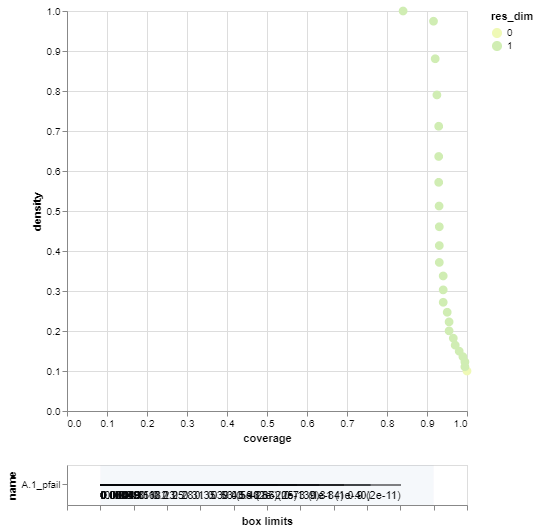

In [6]:
from ema_workbench.analysis import prim

outcomes_interest = outcomes_df['EAD'] > np.percentile(outcomes_df['EAD'],90)
outcomes_interest

prim_alg = prim.Prim(experiments, outcomes_interest, threshold=0.7, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.inspect_tradeoff()

coverage    0.84021
density           1
id               23
mass          0.084
mean              1
res_dim           1
Name: 23, dtype: object

             box 23                       
                min       max    qp values
A.1_pfail  0.000488  0.083984  [-1.0, 0.0]



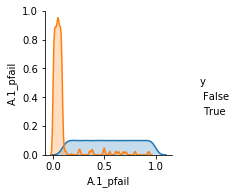

In [7]:
box1.inspect(23)
plt.show()

box1.select(23)
fig = box1.show_pairs_scatter()
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 40000 points remaining, containing 4000 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.075, coverage: 0.75, density: 1.0 restricted_dimensions: 1


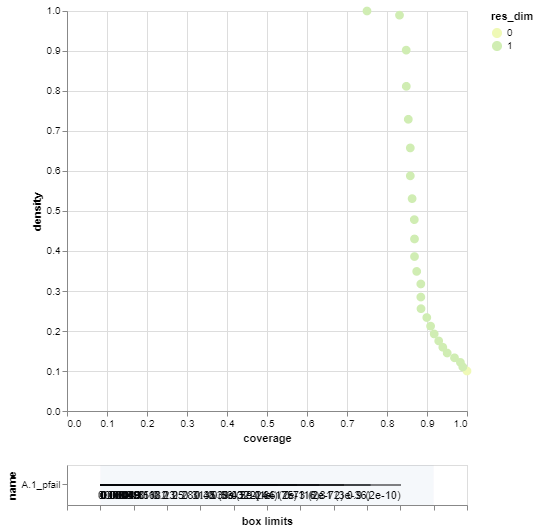

In [8]:
outcomes_interest = outcomes_df['END'] > np.percentile(outcomes_df['END'],90)
outcomes_interest

prim_alg = prim.Prim(experiments, outcomes_interest, threshold=0.7, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.inspect_tradeoff()

coverage     0.75
density         1
id             24
mass        0.075
mean            1
res_dim         1
Name: 24, dtype: object

             box 24                       
                min       max    qp values
A.1_pfail  0.000488  0.075439  [-1.0, 0.0]



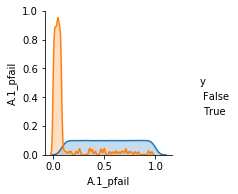

In [9]:
box1.inspect(24)
plt.show()

box1.select(24)
fig = box1.show_pairs_scatter()
plt.show()

In [10]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 37000 points remaining, containing 1000 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.17540060632308357, returning dump box


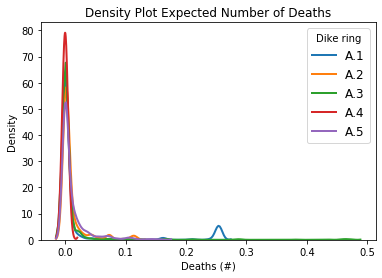

In [18]:
import seaborn as sns
sns.distplot(outcomes_df['A.1_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.005},
                 label = 'A.1')
sns.distplot(outcomes_df['A.2_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.005},
                 label = 'A.2')
sns.distplot(outcomes_df['A.3_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.005},
                 label = 'A.3')
sns.distplot(outcomes_df['A.4_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.005},
                 label = 'A.4')
sns.distplot(outcomes_df['A.5_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.005},
                 label = 'A.5')

plt.legend(prop={'size': 12}, title = 'Dike ring')
plt.title('Density Plot Expected Number of Deaths')
plt.xlabel('Deaths (#)')
plt.ylabel('Density')
plt.savefig('export/images/density_deaths')

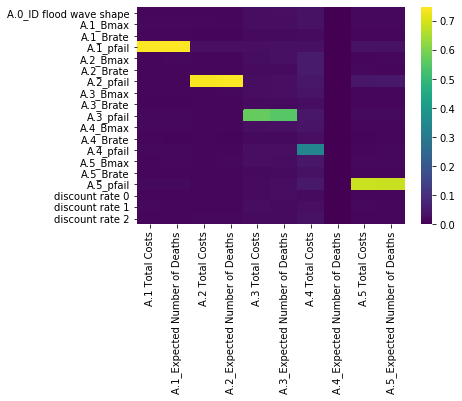

In [21]:
from ema_workbench.analysis import feature_scoring

x = experiments.iloc[:,0:19]
y = outcomes_df.iloc[:,9:]

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=False)
plt.savefig('export/images/scoring.png')
plt.show()

[MainProcess/INFO] 40000 points remaining, containing 8000 cases of interest
[MainProcess/INFO] mean: 0.35043988269794724, mass: 0.05115, coverage: 0.089625, density: 0.35043988269794724 restricted_dimensions: 9


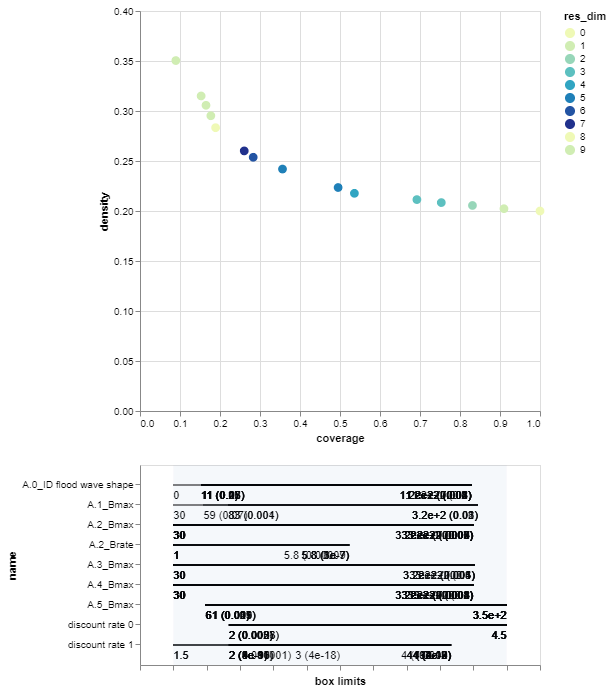

In [25]:
experiments_no_pfail = experiments.iloc[:,[0,1,2,4,5,7,8,10,11,13,14,16,17,18]]

outcomes_interest = outcomes_df['END'] > np.percentile(outcomes_df['END'],80)
outcomes_interest

prim_alg = prim.Prim(experiments_no_pfail, outcomes_interest, threshold=0.3, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.inspect_tradeoff()

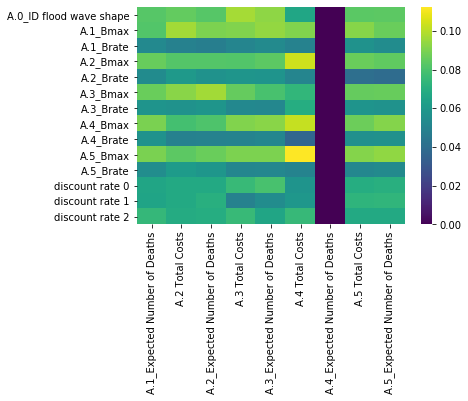

In [26]:
x = experiments_no_pfail
y = outcomes_df.iloc[:,10:]

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=False)
plt.savefig('export/images/scoring_no_pfail.png')
plt.show()